# Real State Regression Challenge

Memprediksi harga jual properti residensial tergantung pada sejumlah faktor, termasuk usia properti, ketersediaan fasilitas lokal, dan lokasi.

Dalam tantangan ini, Anda akan menggunakan kumpulan data transaksi penjualan real estat untuk memprediksi harga per unit properti berdasarkan fitur-fiturnya. Harga per unit dalam data ini didasarkan pada pengukuran satuan 3,3 meter persegi.

### Review Data

In [9]:
import pandas as pd

# Memasukan dataset untuk dilatih
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Train a Regression Model

### View the label distribution

C:\Users\restu\AppData\Local\Temp\ipykernel_5420\2264163211.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


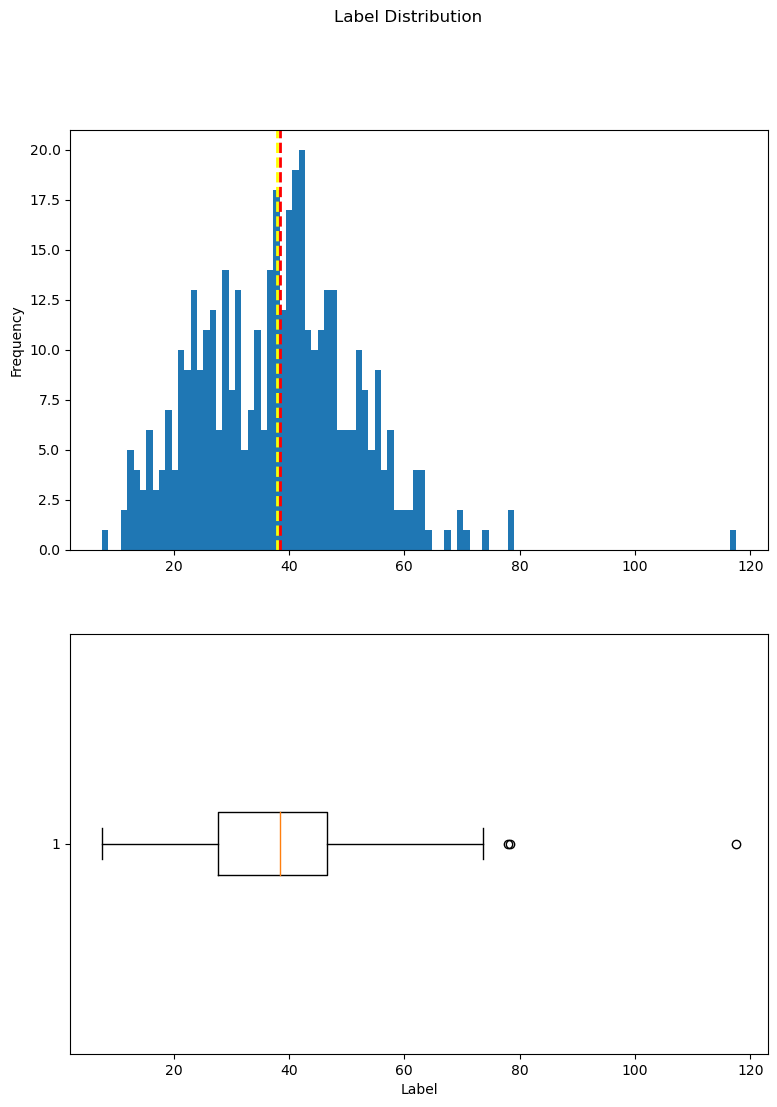

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Mendapatkan Kolom label
label = data[data.columns[-1]]

# Membuat figur untuk 2 subplot(2 baris, 1 kolom)
fig, ax = plt.subplots(2, 1, figsize=(9, 12))

# Menampilkan Plot Histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Menambahkan garis untuk mean, median dan modus
ax[0].axvline(label.mean(), color='yellow', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='red', linestyle='dashed', linewidth=2)

# Mampilkan bloxpot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

# Manambahkan Judul di Figur
fig.suptitle('Label Distribution')

# Menampilkan hasil di layar
fig.show()

### Remove Outliers

C:\Users\restu\AppData\Local\Temp\ipykernel_5420\1968729794.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


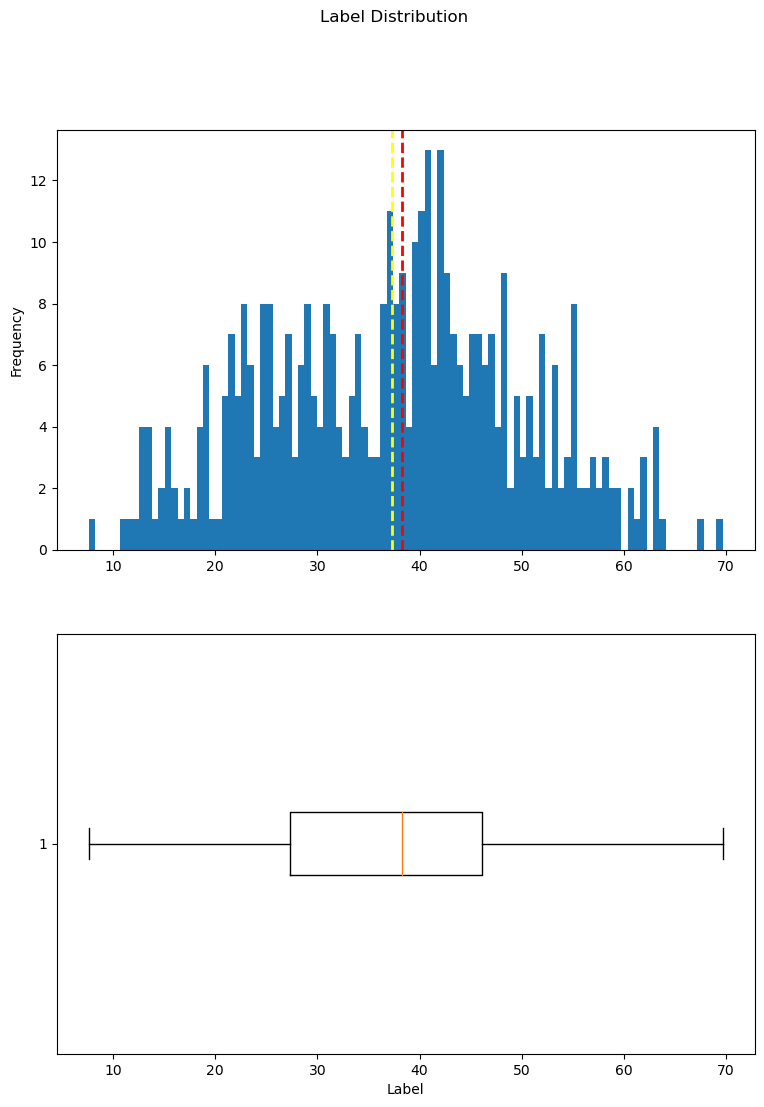

In [27]:
data = data[data['price_per_unit']<70]

# Mendapatkan label kolom
label = data[data.columns[-1]]

# Membuat figur menjadi 2 subplot(2 baris, 1 kolom)
fig, ax = plt.subplots(2, 1, figsize=(9, 12))

# Membuat plot histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Membuat garis untuk mean, median, modus
ax[0].axvline(label.mean(), color='yellow', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='red', linestyle='dashed', linewidth=2)

# Membuat Boplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

# Menambahkan judul fugure
fig.suptitle('Label Distribution')

# Menampilkan hasil di layar
fig.show()

### View Numeric Correlations

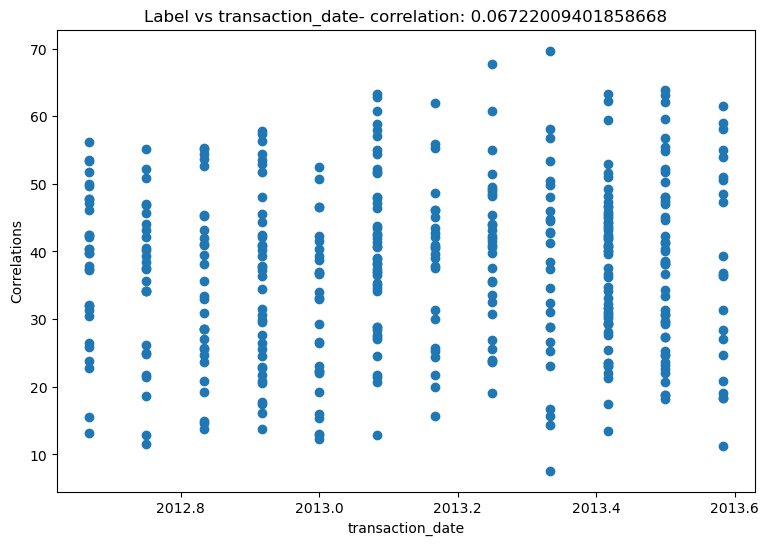

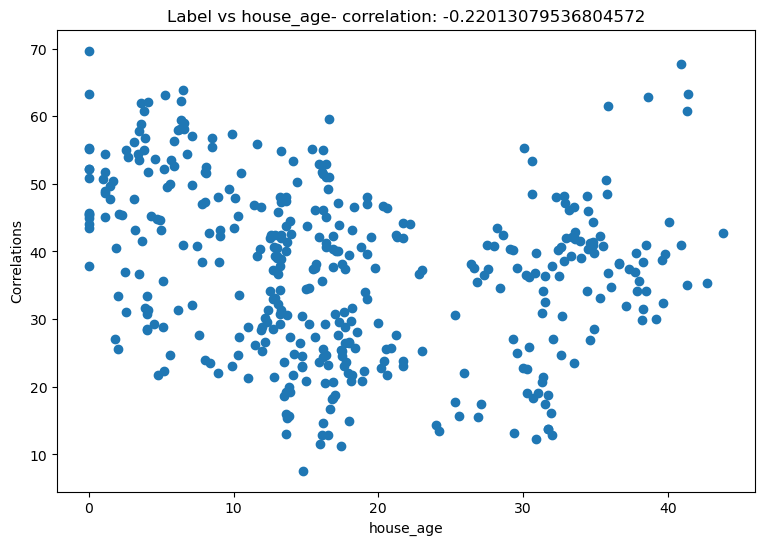

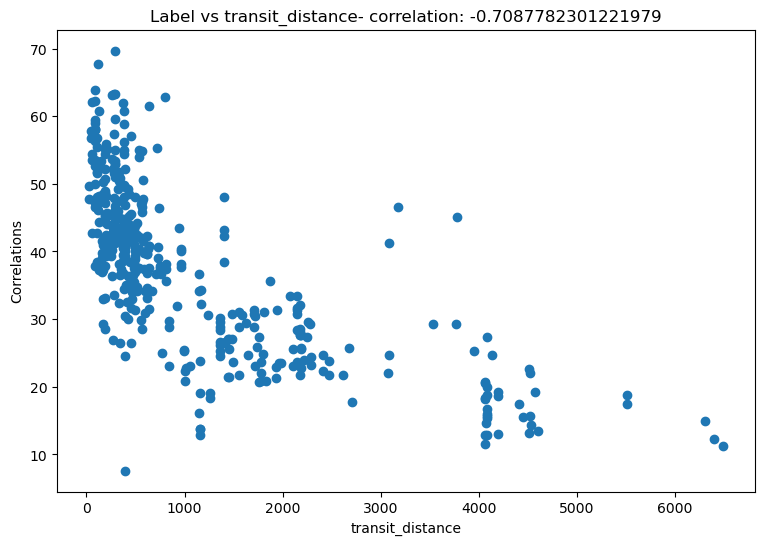

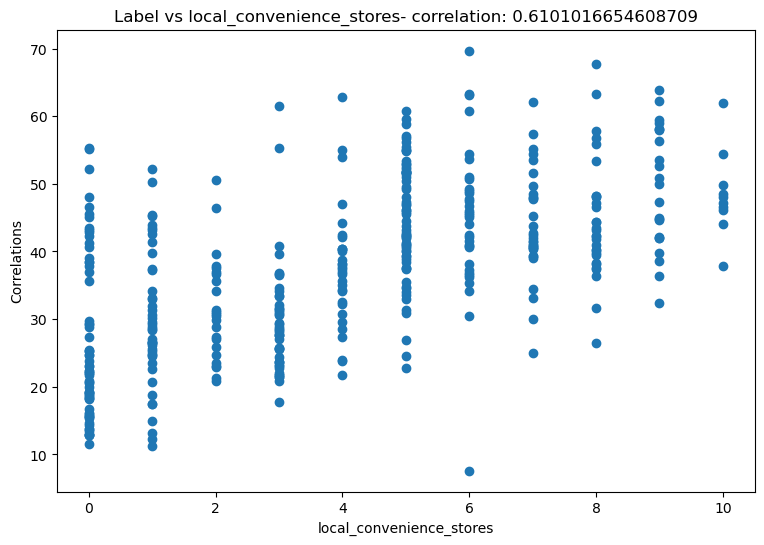

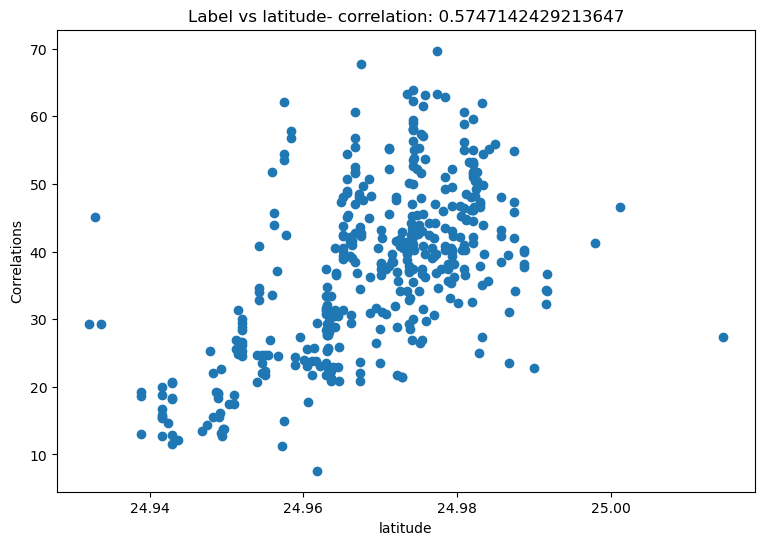

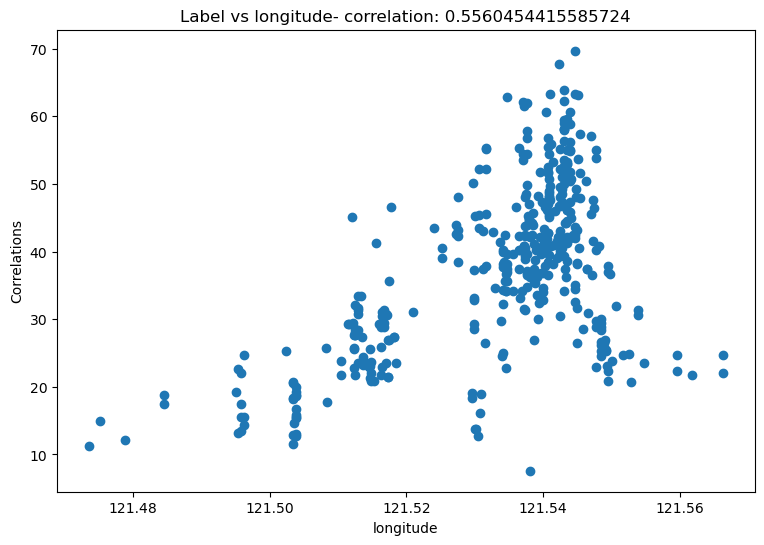

In [31]:
for col in data[data.columns[0: -1]]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Correlations')
    ax.set_title('Label vs ' + col + '- correlation: ' + str(correlation))
plt.show()

### View Categorical Features

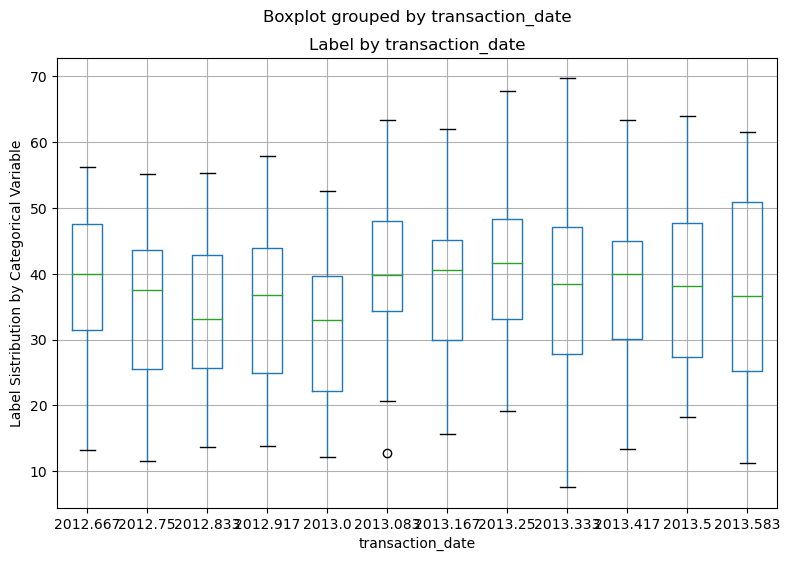

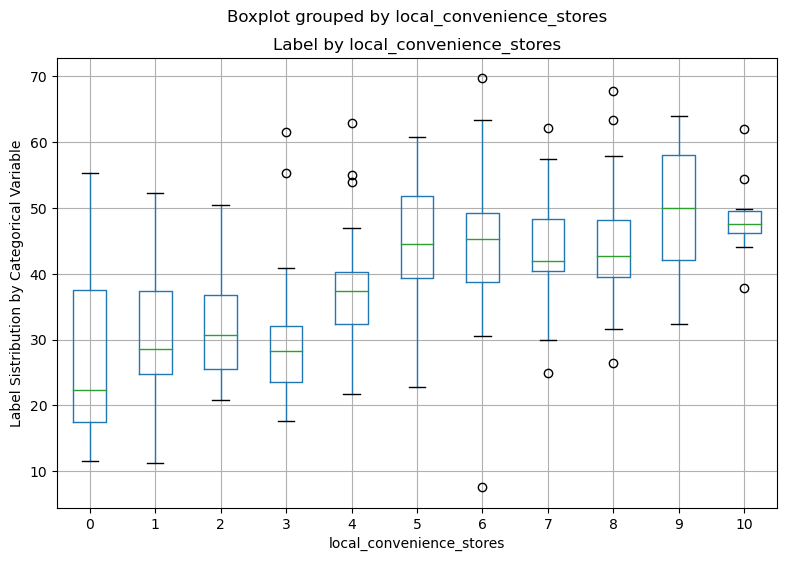

In [45]:
# Membuat Boxplot untuk label bagi seluruh fitur kategoris
for col in data[['transaction_date', 'local_convenience_stores']]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data.boxplot(column = 'price_per_unit', by=col, ax=ax)
    ax.set_title('Label by '+ col )
    ax.set_ylabel('Label Sistribution by Categorical Variable')
plt.show()   

 ### Separate features and label and split data for training and validation

In [15]:
from sklearn.model_selection import train_test_split

# Fitur terpisah (kolom 1[house_age] ke yang terakhir hanya satu saja) dan labe
X, y = data[data.columns[1:-1]].values, data[data.columns[-1]].values

# Memisahkan data 70%-30% untuk di latih dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 285 rows
Test Set: 123 rows


### Preprocess the data and train a model in a pipeline

In [21]:
# Melatih model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Menentukan pemrosesan untuk kolom numerik 
numeric_features = [0, 1, 3, 4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Menggabungkan langkah-langkah Prapemrosessan
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

# Membuat alur prapemrosessan dan pelatihan
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])

# Menyesuaikan alur untuk melatih model regresi linear pada pelatihan
model = pipeline.fit(X_train, (y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])


### Evaluate the Model

MSE: 37.85320987458183
RMSE 6.152496231171688
R2 0.6769968503409864


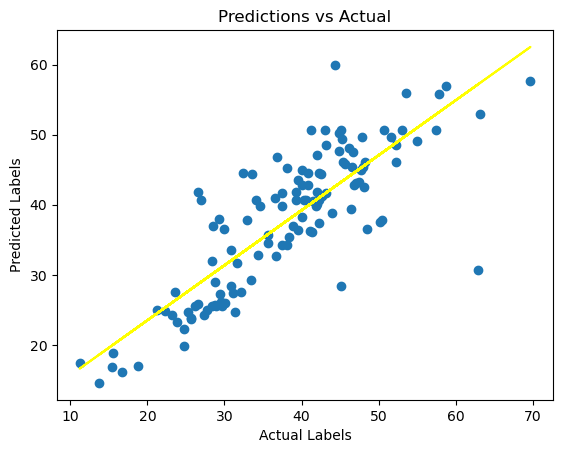

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Mendapatkan Prediksi
predictions = model.predict(X_test)

# Menampilkan Metriks
mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE', rmse)
r2 = r2_score(y_test, predictions)
print('R2', r2)

# Menggambarkan Plot
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actual')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='yellow')
plt.show()

### Use the Trained Model

In [25]:
import joblib

# Menyimpan model sebagai file acak
filename = './real_estate_model.pkl'
joblib.dump(model, filename)

# Memuat model dari file
loaded_model = joblib.load(filename)

# Berbagai fitur untuk setiap transaksi (tidak termasuk tanggal transaksi)
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

# Menggunakan model untuk mempreiksi harga satuan
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction, 2))

Predictions:
49.16
16.78
